In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.figure_factory as ff
import folium
import json
%matplotlib inline

In [2]:
data = pd.read_csv('poverty.csv')
print(data)

       ind_id                                     ind_definition reportyear  \
0         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
1         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
2         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
3         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
4         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
...       ...                                                ...        ...   
32000     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32001     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32002     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32003     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32004     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   

       race_eth_code race_eth_name geotype  geotype

In [3]:
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()

top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(top10_est_county)

              estimate
county_name           
Tulare       61.832955
Merced       55.738610
Imperial     53.720610
Del Norte    52.710133
Kings        52.524742
Fresno       51.828524
Siskiyou     51.662894
Kern         48.986472
Lake         48.910338
Madera       48.178853


Text(0.5, 1.0, 'top 10 county with respective estimated poverty percentage')

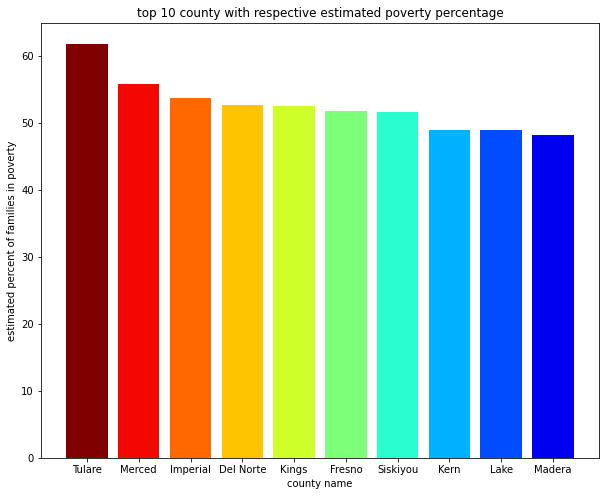

In [4]:
# top 10 county with estimated poverty percentage
plt.figure(figsize=(10, 8))

x = list(top10_est_county.index)
y = top10_est_county['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('county name')
plt.ylabel('estimated percent of families in poverty')
plt.title('top 10 county with respective estimated poverty percentage')

In [5]:
estimate_by_race = data[['estimate', 'race_eth_name']]
estimate_by_race = estimate_by_race.dropna()
avg_est_race = estimate_by_race.groupby('race_eth_name').mean()

# top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(avg_est_race)

                estimate
race_eth_name           
AIAN           56.243495
AfricanAm      47.645574
Asian          27.753202
Latino         49.722367
Multiple       30.987263
NHOPI          57.114103
Other          50.491672
Total          36.837857
White          25.433010


Text(0.5, 1.0, 'percentage of families in poverty over different races')

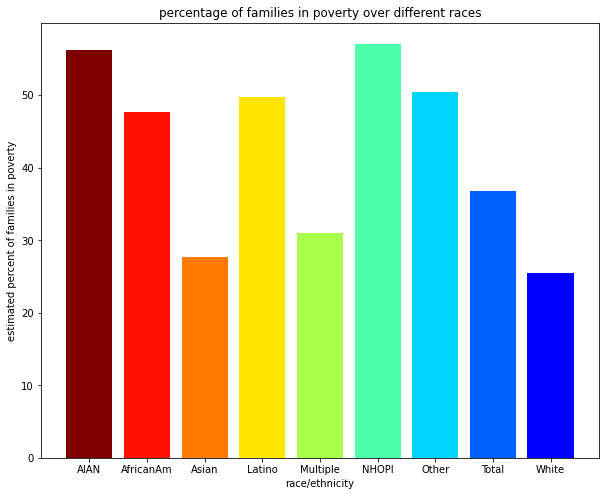

In [6]:
# poverty percentage w.r.t race 
plt.figure(figsize=(10, 8))

x = list(avg_est_race.index)
y = avg_est_race['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('race/ethnicity')
plt.ylabel('estimated percent of families in poverty')
plt.title('percentage of families in poverty over different races')

In [7]:
# poverty heatmap by county
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name', 'county_fips']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()
avg_est_county['county_fips'] = avg_est_county['county_fips'].astype(int)

In [8]:
print(avg_est_county)

                  estimate  county_fips
county_name                            
Alameda          27.836576         6001
Alpine           35.740557         6003
Amador           29.704160         6005
Butte            44.470201         6007
Calaveras        30.379899         6009
Colusa           43.709902         6011
Contra Costa     24.393524         6013
Del Norte        52.710133         6015
El Dorado        26.681224         6017
Fresno           51.828524         6019
Glenn            46.317511         6021
Humboldt         43.727558         6023
Imperial         53.720610         6025
Inyo             28.096828         6027
Kern             48.986472         6029
Kings            52.524742         6031
Lake             48.910338         6033
Lassen           34.049759         6035
Los Angeles      40.380822         6037
Madera           48.178853         6039
Marin            18.651370         6041
Mariposa         31.351878         6043
Mendocino        45.182516         6045


In [9]:
values = avg_est_county['estimate'].tolist()
fips = avg_est_county['county_fips'].tolist()
color = ['#c35b7e' , '#910736', '#866ba8', '#f13710', '#f8c928', '#ff8817']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[17.394022, 27.569496, 37.74497, 47.920444, 58.095918],
    colorscale=color,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Poverty Level by County', title='California Poverty Level by County'
)
fig.layout.template = None
fig.show()

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:359: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x = [
/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:363: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  y = [
/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x_c = [poly.centroid.xy[0].tolist() for poly in fips_polygon_map[f]]
/opt/anaco

In [10]:
county_food_inse = pd.read_csv('county food insercuity in CA.csv')

In [11]:
print(county_food_inse['percent'].mean() + 2 * county_food_inse['percent'].std())

17.740770877333055


In [12]:
# food insecurity level by county
values = county_food_inse['percent'].tolist()
fips = county_food_inse['fips'].tolist()
color = ['#c35b7e' , '#910736', '#866ba8', '#f13710', '#f8c928', '#ff8817']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[6.100608433011778, 9.010649044092098, 11.920689655172417, 14.830730266252736, 17.740770877333055],
    colorscale=color,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Food Insecurity Percentage by County', title='California Food Insecurity Percentage by County'
)
fig.layout.template = None
fig.show()

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:359: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:363: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/plotly/figure_factory/_county_chorop

In [42]:
sd_data = pd.read_csv('January2021DataTables.csv')
sd_data = sd_data.dropna()
sd_data['Estimated Monthly Meal Gap'] = sd_data['Estimated Monthly Meal Gap'].apply(lambda x: float(x.split()[0].replace(',', '')))
sd_data['Estimated Monthly Meal Gap'] = sd_data['Estimated Monthly Meal Gap'].astype(float)
print(sd_data)

       City/Unincorperated Community  Zip Code  Estimated Monthly Meal Gap
0                             Alpine   91901.0                    137718.0
1                             Bonita   91902.0                     49517.0
2                          Boulevard   91905.0                      2041.0
3                              Campo   91906.0                    103444.0
4                        Chula Vista   91910.0                    213600.0
..                               ...       ...                         ...
100                        San Diego   92140.0                       100.0
101   San Diego/Mira Mar Air Station   92145.0                      4947.0
102              San Diego/Otay Mesa   92154.0                    419287.0
103  San Diego/Naval Amphibious Base   92155.0                       100.0
104                       San Ysidro   92173.0                     85246.0

[105 rows x 3 columns]


In [37]:
sum(sd_data['Estimated Monthly Meal Gap'] == '-')

0

In [47]:
with open('san_diego_boundary_datasd.geojson') as f:
    geo_data = json.load(f)

In [59]:
print(geo_data)

{'type': 'FeatureCollection', 'name': 'san_diego_boundary_datasd', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'objectid': 48, 'code': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-117.01058783984027, 32.86317753864654], [-117.01058392862832, 32.86302767894415], [-117.0105792649312, 32.86284915924387], [-117.01057474186308, 32.86267607517923], [-117.01057006672252, 32.8624975459285], [-117.01056859014373, 32.86243804895885], [-117.01066666192422, 32.86243744514357], [-117.01078334676193, 32.86250001460427], [-117.01104429134102, 32.86256883454263], [-117.01127273989809, 32.86275563842252], [-117.01141564954585, 32.86279430359089], [-117.01150948828533, 32.86281968600878], [-117.01127106649264, 32.863097873527224], [-117.01111300960392, 32.86309034220567], [-117.01088569465476, 32.86313102034941], [-117.01081054518849, 32.86314918684633], [-117.01062934808323, 32.86317225336452], [-117.0105878

In [67]:
# table = main table/data frame we read from (pandas DataFrame)
# zips = column name where ZIP codes are (string)
# mapped feature = column name for feature we want to visualize (string)
# add text = any additional commentary to be added in the map legend (string)
def create_map(table, zips, mapped_feature, add_text=''):
    # reading of the updated GeoJSON file
    geo = 'san_diego_boundary_datasd.geojson'
    m = folium.Map(location=['29.4241', '98.4936'], zoom_start=11)
    m.choropleth(
        geo_data=geo,
        fill_opacity=0.7,
        line_opacity=0.2,
        data=table,
        key_on='features.properties.zip',
        columns=[zips, mapped_feature],
        fill_color='RdYlGn',
        legend_name='test'
    )
    folium.LayerControl().add_to(m)
    m.save(outfile='test.html')

In [68]:
create_map(sd_data, 'Zip Code', 'Estimated Monthly Meal Gap')

/opt/anaconda3/envs/ece143/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



AttributeError: 'NoneType' object has no attribute 'get'

In [73]:
import folium
import pandas as pd
import json
from folium import plugins

#read the data
df = pd.read_excel('January+2021+Data+Tables+SD+Food+Insecurity.xlsx', sheet_name='FoodAssistJan2021Zip')

#read the san diego boundary data
with open('Zip Codes.geojson') as f:
    sdArea = json.load(f)

#group the food insecure dataframe by zip code
numFoodInsecuritySeries = [df['Zip Code'], df['Total Food Assistance']]

#initialize an empty dataframe to store this new data
numFoodSecurityByZip = pd.DataFrame()
#populate the new dataframe with a 'zipcode' column and a 'numFoodInsecure' column
numFoodSecurityByZip['zipcode'] = [str(i) for i in numFoodInsecuritySeries[0]]
numFoodSecurityByZip['numFoodInsecure'] = [int(i) for i in numFoodInsecuritySeries[1]]
numFoodSecurityByZip.drop(numFoodSecurityByZip.tail(1).index,inplace=True) 

#initialize the LA County map
sdMap = folium.Map(location=[32.7157,-117.1611], zoom_start=12)

#draw the choropleth map. These are the key components:
#--geo_path: the geojson which you want to draw on the map [in our case it is the zipcodes in LA County]

#--data: the pandas dataframe which contains the zipcode information 
# AND the values of the variable you want to plot on the choropleth

#--columns: the columns from the dataframe that you want to use 
#[this should include a geospatial column [zipcode] and a variable [numFoodInsecure]

#--key_on: the common key between one of your columns and an attribute in the geojson. 
#This is how python knows which dataframe row matches up to which zipcode in the geojson

folium.Choropleth(geo_data='Zip Codes.geojson', 
                  data=numFoodSecurityByZip, 
                  columns=['zipcode', 'numFoodInsecure'],
                  key_on='feature.properties.zip', 
                  fill_color='YlGn', fill_opacity=1)

sdMap.save('sdChoropleth.html')

In [71]:
print(sdArea['features'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

